In [1]:
#Importing all the required libraries
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
#Loading fashion mnist data
fashion_mnist=keras.datasets.fashion_mnist

In [4]:
(train_images,train_labels),(test_images,test_labels)=fashion_mnist.load_data()

In [5]:
len(train_labels)

60000

In [7]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [8]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [9]:
len(train_images)

60000

In [11]:
train_images.shape

(60000, 28, 28)

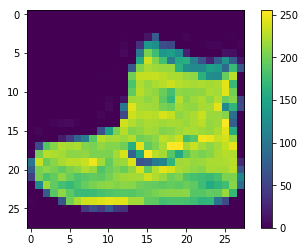

In [18]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)

In [20]:
train_images=train_images/255.0

In [21]:
test_images=test_images/255.0

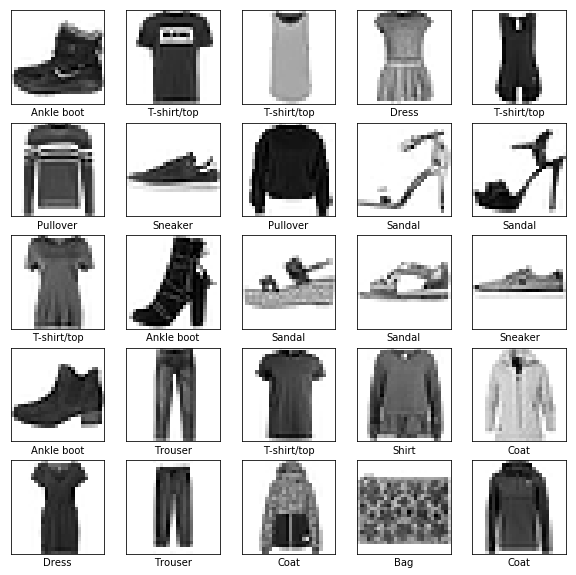

In [33]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i],cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

In [34]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [37]:
model.compile(optimizer=tf.train.AdamOptimizer(),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [38]:
model.fit(train_images,train_labels,epochs=5)

Epoch 1/5
60000/60000 [==============================] - 5s 80us/step - loss: 0.4983 - acc: 0.8251
Epoch 2/5
60000/60000 [==============================] - 4s 70us/step - loss: 0.3777 - acc: 0.8633
Epoch 3/5
60000/60000 [==============================] - 5s 90us/step - loss: 0.3385 - acc: 0.8769
Epoch 4/5
60000/60000 [==============================] - 4s 71us/step - loss: 0.3138 - acc: 0.8833: 1s - los
Epoch 5/5
60000/60000 [==============================] - 5s 89us/step - loss: 0.2954 - acc: 0.8912


In [39]:
test_loss,test_accuracy=model.evaluate(test_images,test_labels)

10000/10000 [==============================] - 0s 41us/step


In [40]:
print test_accuracy

0.8737


In [41]:
predictions=model.predict(test_images)

In [42]:
predictions[0]

array([1.1755970e-06, 1.4177235e-07, 5.3384777e-08, 1.4126737e-08,
       5.3179187e-06, 2.1616284e-02, 3.6522204e-06, 3.4821495e-02,
       1.3415750e-05, 9.4353849e-01], dtype=float32)

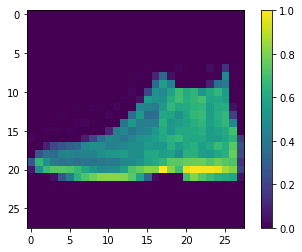

In [43]:
#confidence is more for 9th category..We will see by printing the image
plt.figure()
plt.imshow(test_images[0])
plt.colorbar()

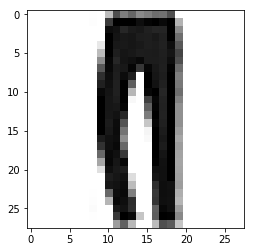

In [47]:
plt.figure()
plt.imshow(test_images[2],cmap=plt.cm.binary)
#plt.colorbar()

In [48]:
#3rd test image is trouser..Let's see what our model has predicted
predictions[2]

array([7.1197328e-06, 9.9999022e-01, 6.4380885e-08, 2.3691455e-06,
       1.7032927e-07, 2.0891544e-14, 2.1093398e-09, 1.8295437e-15,
       6.0797867e-11, 5.0836852e-13], dtype=float32)

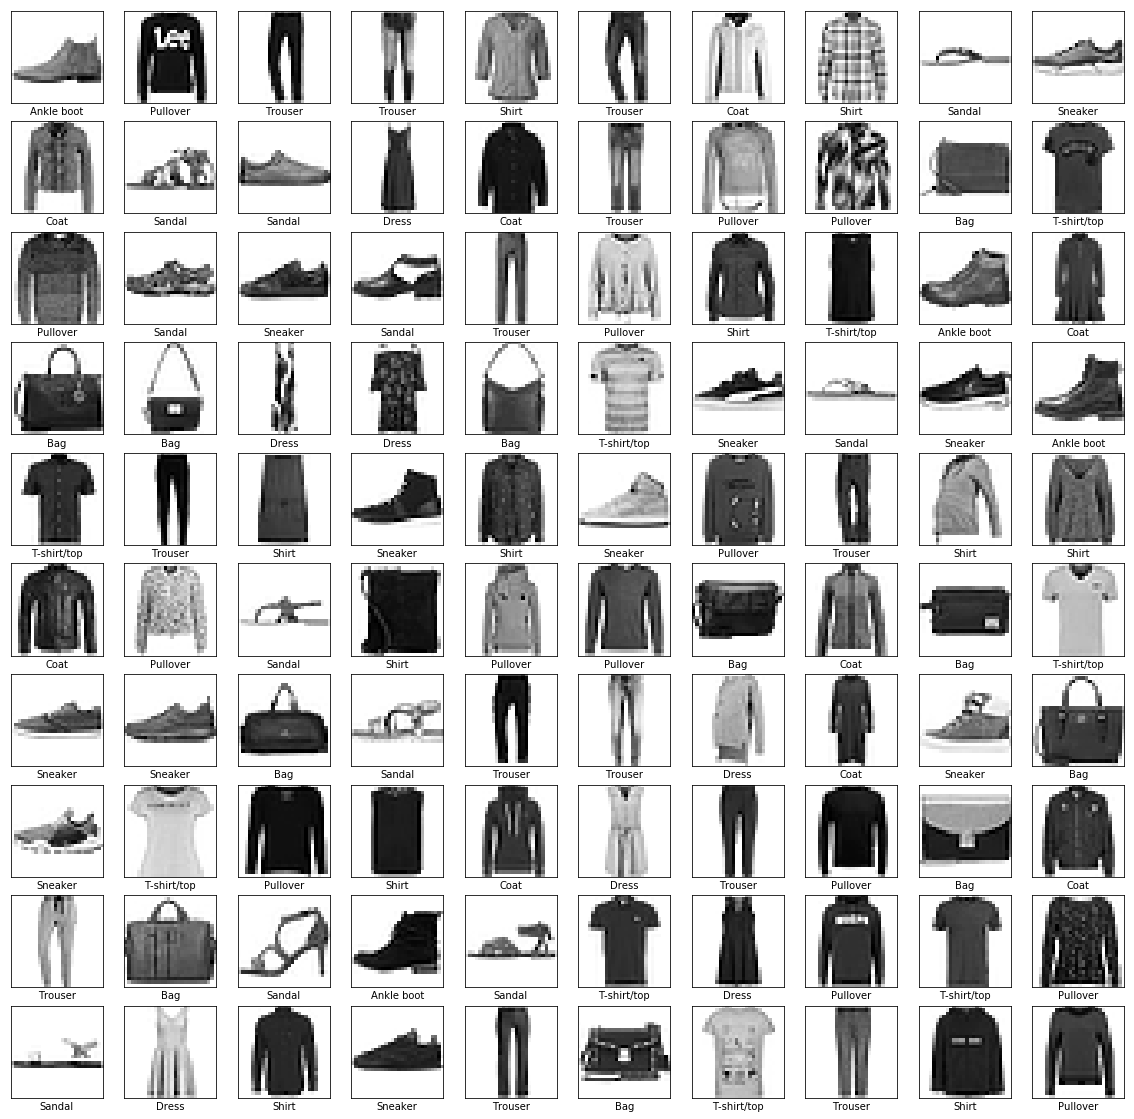

In [56]:
#Let's see the prediction results for first 100 test images
plt.figure(figsize=(20,20))
for i in range(100):
    plt.subplot(10,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i],cmap=plt.cm.binary)
    plt.xlabel(class_names[np.argmax(predictions[i])])